### **lab 08 - linear regression**
#### **task 01**

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv("CarPrice_Assignment.csv")

df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [3]:
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [4]:
df.shape

(205, 26)

In [5]:
df.select_dtypes(include='object').columns

Index(['CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber',
       'fuelsystem'],
      dtype='object')

In [6]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


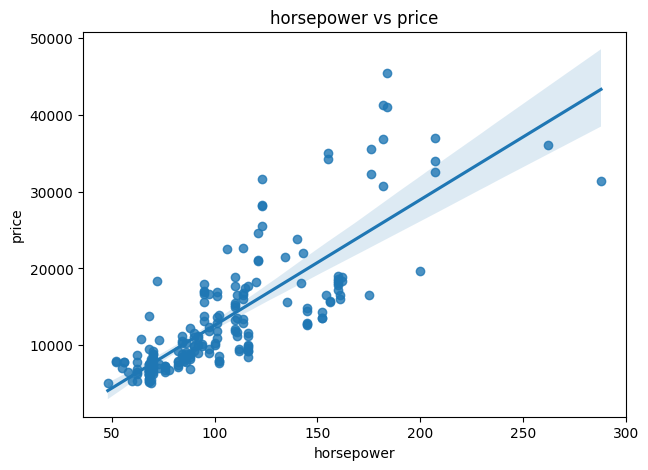

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(7,5))
sns.regplot(x=df["horsepower"], y=df["price"])
plt.title("horsepower vs price")
plt.show()

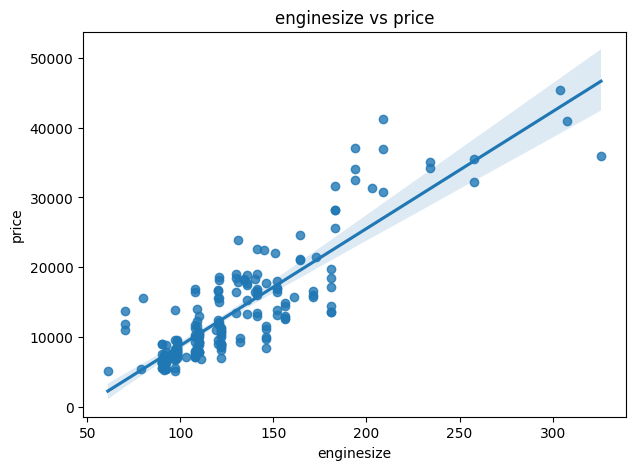

In [8]:
plt.figure(figsize=(7,5))
sns.regplot(x=df["enginesize"], y=df["price"])
plt.title("enginesize vs price")
plt.show()

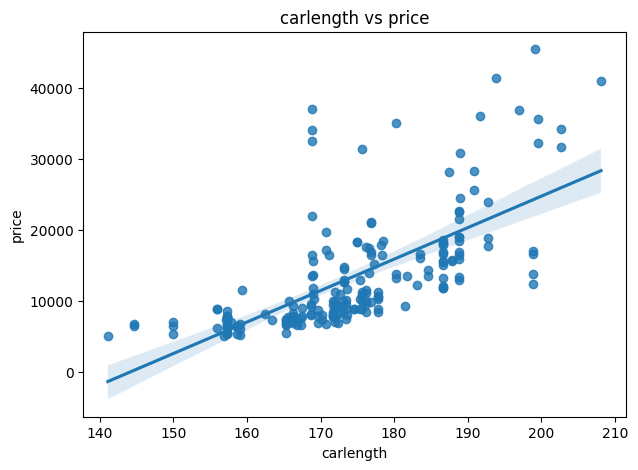

In [9]:
plt.figure(figsize=(7,5))
sns.regplot(x=df["carlength"], y=df["price"])
plt.title("carlength vs price")
plt.show()

for linear regression we'll use one-hot encoding

- it turns each category into a binary column (0/1).
- this prevents the model from assuming numeric order between categories.

In [10]:
#drop the id col
df_model = df.drop("car_ID", axis=1)

In [11]:
df_model.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [12]:
#one-hot encode all categorical columns
df_model = pd.get_dummies(df_model, drop_first=True)

df_model.head()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,...,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,...,False,False,False,False,False,False,False,True,False,False
1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,...,False,False,False,False,False,False,False,True,False,False
2,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,...,False,False,False,False,False,False,False,True,False,False
3,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,...,False,False,False,False,False,False,False,True,False,False
4,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,...,False,False,False,False,False,False,False,True,False,False


In [13]:
#train-test-split
from sklearn.model_selection import train_test_split

#separate features and target
X = df_model.drop("price", axis=1)
y = df_model["price"]

#split into train and test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

X_train.shape, X_test.shape

((164, 189), (41, 189))

- 189 cols
- 164 rows for training
- 41 rows for testing

In [14]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


this will compute all coefficients using ordinary least squares

In [15]:
model.coef_

array([ 1.11391756e+03,  3.94617695e+02, -3.35004775e+02,  8.81249664e+02,
       -5.79276391e+02,  1.87269560e+01,  1.52313676e+01, -5.75538464e+03,
       -2.97300017e+02, -1.44924164e+03, -3.88410209e+01,  1.95155448e+00,
       -6.79783059e+01,  1.33830069e+02,  2.60181624e+03, -5.64040808e+03,
       -2.63540808e+03, -8.63470916e+02, -2.71648909e+03, -2.53085352e+02,
       -1.73287461e+03,  5.40239853e-10,  2.10727178e+03,  3.74666189e+03,
        1.64390223e+04,  1.42141855e+04, -5.84805093e-10, -5.03860065e-10,
        1.28571606e+04, -1.29921318e-09,  3.49700713e-10,  9.24501364e-10,
       -4.69412953e-10, -2.04524633e+03,  9.16573076e+03,  1.16326147e+03,
       -2.98718442e+03,  6.70979716e-10, -2.49381660e+03, -4.73584449e+03,
       -3.21498196e+03, -8.16699911e+03, -2.73757905e-10, -8.89246695e+03,
       -4.03905886e+03, -6.32125404e+03, -3.44771687e+03, -7.25844668e+03,
       -3.99910992e+03, -1.08345860e+03, -4.39750724e+03, -3.29573286e+03,
       -2.36988073e+03, -

In [16]:
model.intercept_

np.float64(-7925.563933059231)

In [17]:
#predict
y_pred = model.predict(X_test)

y_pred[:5]

array([13907.57151604, 20592.93292803, 13012.62517672,  7686.26414981,
       27128.65418377])

In [19]:
#evaluate
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"r2: {r2}")
print(f"mean absolute error: {mae}")
print(f"mean squared error: {mse}")

r2: 0.47371533157454937
mean absolute error: 4177.295631352959
mean squared error: 41547027.85282249


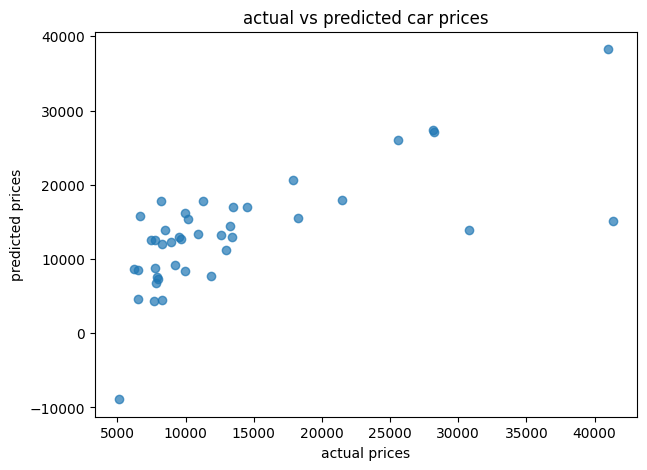

In [20]:
plt.figure(figsize=(7,5))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel("actual prices")
plt.ylabel("predicted prices")
plt.title("actual vs predicted car prices")
plt.show()

In [21]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)

y_pred_ridge = ridge.predict(X_test)

print(f"ridge R2: {r2_score(y_test, y_pred_ridge)}")
print(f"ridge mae: {mean_absolute_error(y_test, y_pred_ridge)}")

ridge R2: 0.8724702261558864
ridge mae: 2098.1412808200134


Ridge reduces the influence of unstable coefficients

Handles high-dimensional one-hot spaces better

Usually increases R² and reduces errors

Very easy to justify in your lab report